In [2]:
!pip install easyocr
!pip install googletrans

     |████████████████████████████████| 63.6 MB 36 kB/s 
     |████████████████████████████████| 47.6 MB 68 kB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 1.3 MB 10.6 MB/s 
     |████████████████████████████████| 53 kB 2.9 MB/s 
     |████████████████████████████████| 65 kB 4.5 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=fb1ae4c923b7b7bb3a04228191ba616b405f24b3b59107024b3faf5958cad1fd
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [ ]:
# import cv2
# import matplotlib.pyplot as plt
# import easyocr
# import sys
# import googletrans
# from typing import List
# import requests
# import numpy as np
# from PIL import Image, ImageFont, ImageDraw

# # Press Shift+F10 to execute it or replace it with your code.
# # Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

# # 이미지 파일 경로
# file_path = r'patientC.jpg'
# img = cv2.imread(file_path, cv2.IMREAD_COLOR)

# CLIENT_ID = "MawiiHEojSbWlRvZjWEM"
# CLIENT_SECRET = "gY1PNWHP54"

# if img is None:
#     print('Image load failed!')
#     sys.exit()


# # 이미지 출력함수
# def display(img):
#     # img_rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
#     plt.figure(figsize=(15, 15))
#     plt.imshow(img)
#     plt.show()


# def cleanup_text(text):
#     # strip out non-ASCII text so we can draw the text on the image
#     # using OpenCV
#     return "".join([c if ord(c) < 128 else "" for c in text]).strip()


# def easy_ocr_result(img, language='en', draw=True, text=False):
#     reader = easyocr.Reader([language])
#     results = reader.readtext(img)

#     # 바운딩박스 리스트
#     bbox_list = []
#     # 텍스트 리스트
#     text_list = []

#     if draw == False: # 원래 이미지만 출력
#         display(img)

#     elif draw == True and text == False: # 이미지에 바운딩 박스그리기
#         img2 = img.copy()
#         # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
#         for (bbox, text, prob) in results:
#             # display the OCR'd text and associated probability
#             # print("[INFO] {:.4f}: {}".format(prob, text))

#             bbox_list.append(bbox)
#             text_list.append(text)
#             # unpack the bounding box
#             (tl, tr, br, bl) = bbox
#             tl = (int(tl[0]), int(tl[1]))
#             tr = (int(tr[0]), int(tr[1]))
#             br = (int(br[0]), int(br[1]))
#             bl = (int(bl[0]), int(bl[1]))
#             # cleanup the text and draw the box surrounding the text along
#             # with the OCR's text itself
#             cv2.rectangle(img2, tl, br, (255, 0, 0), 2)

#         # show the output image
#         display(img2)

#     elif draw == True and text == True:  # 이미지에 바운딩 + 인식한 글자
#         img2 = img.copy()
#         # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

#         for (bbox, text, prob) in results:
#             # display the OCR'd text and associated probability
#             # print("[INFO] {:.4f}: {}".format(prob, text))

#             bbox_list.append(bbox)
#             text_list.append(text)

#             # unpack the bounding box
#             (tl, tr, br, bl) = bbox
#             tl = (int(tl[0]), int(tl[1]))
#             tr = (int(tr[0]), int(tr[1]))
#             br = (int(br[0]), int(br[1]))
#             bl = (int(bl[0]), int(bl[1]))
#             # cleanup the text and draw the box surrounding the text along
#             # with the OCR'd text itself
#             text = cleanup_text(text)
#             cv2.rectangle(img2, tl, br, (255, 0, 0), 2)
#             cv2.putText(img2, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

#         # show the output image
#         display(img2)
#     return np.array(bbox_list), text_list


# def translate_texts(texts: List[str], type='google') -> List[str]:
#     global tranlated_texts
#     if type == 'google':
#         translator = googletrans.Translator()
#         tranlated_texts = [
#             translator.translate(text=text, src='en', dest='ko').text
#             for text in texts
#         ]
#     elif type == 'naver':
#         url = "https://openapi.naver.com/v1/papago/n2mt"
#         header = {"X-Naver-Client-Id": CLIENT_ID, "X-Naver-Client-Secret": CLIENT_SECRET}
#         tranlated_texts = []
#         for text in texts:
#             data = {'text': text, 'source': 'en', 'target': 'ko'}
#             response = requests.post(url, headers=header, data=data)
#             rescode = response.status_code
#             if rescode == 200:
#                 t_data = response.json()
#                 tranlated_texts.append(t_data['message']['result']['translatedText'])
#             else:
#                 print("Error Code:", rescode)

#     return tranlated_texts
# def cut_image(img, bbox):
#     x_min = bbox[0, 0]
#     x_max = bbox[1, 0]
#     y_min = bbox[0, 1]
#     y_max = bbox[2, 1]

#     img = img[y_min:y_max, x_min:x_max]

#     return img

# def mask_image(img2):
#     # masking 작업
#     img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#     _, mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)

#     # 글씨 색이 밝든 어둡든 masking 씌워주기
#     return_rgb = rgb(img2)
#     if return_rgb == 0:
#         mask = cv2.bitwise_not(mask)

#     kernel = np.ones((3, 3), np.uint8)
#     mask = cv2.dilate(mask, kernel, iterations=2)
#     # plt.imshow(mask)
#     # plt.show()
#     return mask


# def change_original(masked_img, bbox):
#     x_min = bbox[0, 0]
#     x_max = bbox[1, 0]
#     y_min = bbox[0, 1]
#     y_max = bbox[2, 1]

#     img[y_min:y_max, x_min:x_max] =  masked_img
#     return img

# def rgb(img):
#     r1, g1, b1 = img[0][0]
#     r2, g2, b2 = img[-1][0]
#     r3, g3, b3 = img[-1][-1]
#     r4, g4, b4 = img[0][-1]
#     # 배경이 밝은 부분이 한 부분이라도 있으면
#     ##
#     # 수정필요함 (귀퉁이 4개중 2개 이상이 흰색이면 이런식으로 )
#     if (r1>=0 and g1>150 and b1>150) or (r2>150 and g2>=0 and b2>150)\
#             or (r3>150 and g3>150 and b3>=0) or (r4>150 and g4>150 and b4>150):
#         return 0

# def rewrite(tranlated_texts ,bbox_list):
#     # 폰트( 구글 폰트에서 이용가능 ) , 폰트크기
#     image_path = 'output_inpainting'
#     img = Image.open(f"{image_path}/{file_path}")


#     title_font = ImageFont.truetype('Merriweather-BoldItalic.ttf', 30)
#     image_editable = ImageDraw.Draw(img)
#     # (x, y ) , ( 237, 230, 211) 색감
#     for idx, bbox in enumerate(bbox_list):
#         text = tranlated_texts[idx]
#         # # 내일 만듦(10.30)
#         # wi, hi = title_font.getsize(text)

#         image_editable.text((bbox[0][0], bbox[0][1]), text, (237, 100, 110), font=title_font)

#     save_rewrite_images()

# def decsion_font_size():
#     pass # 내일 만듦(10.30)


# def save_inpainting_images():
#     image_path = f'output_inpainting'
#     save_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     save_img.save(f"{image_path}/{file_path}")

# def save_rewrite_images():
#     image_path = 'output_rewrite'
#     save_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     save_img.save(f"{image_path}/{file_path}")

# # Press the green button in the gutter to run the script.
# if __name__ == '__main__':
#     bbox_list, text_list = easy_ocr_result(img)
#     print('Text_list :', text_list)
#     tranlated_texts: List[str] = translate_texts(texts=text_list, type='naver')
#     print(f'Tranlated_texts : {tranlated_texts}')

#     for bbox in bbox_list:
#         img_cut = cut_image(img, bbox)
#         # plt.imshow(img_cut)
#         # plt.show()
#         mask = mask_image(img_cut)
#         masked_img = cv2.inpaint(img_cut, mask, 3, cv2.INPAINT_TELEA)
#         img = change_original(masked_img, bbox)

#     save_inpainting_images()
#     rewrite(text_list ,bbox_list)





4.5.4-dev


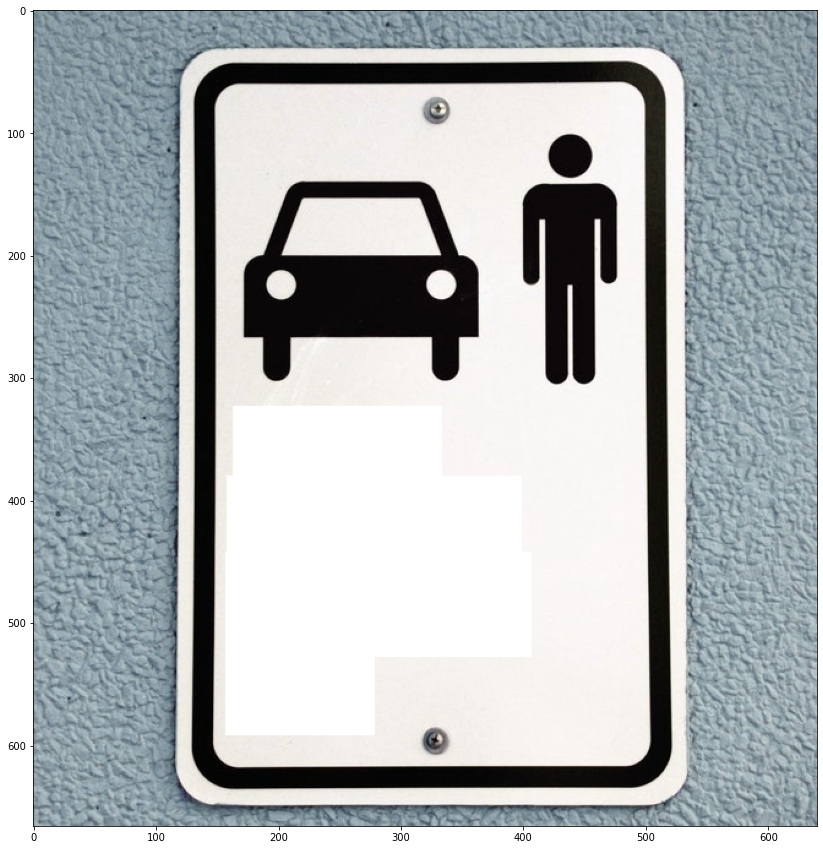

Text_list : ['Patient', 'Pick-Up &', 'Discharge', 'Only']
Tranlated_texts : ['환자', '픽업( Pick-up', '방전', '오직']
[[[163, 323], [333, 323], [333, 385], [163, 385]], [[158, 380], [398, 380], [398, 458], [158, 458]], [[157, 442], [406, 442], [406, 527], [157, 527]], [[157, 511], [278, 511], [278, 591], [157, 591]]]


In [4]:
import cv2
import matplotlib.pyplot as plt
import easyocr
import sys
import googletrans
from typing import List
import requests
import pprint

from google.colab.patches import cv2_imshow
import numpy as np

from PIL import Image 
from PIL import ImageFont
from PIL import ImageDraw


# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

print(cv2.__version__)

# 이미지 파일 경로
file_path = r'patient.jpg'
img = cv2.imread(file_path, cv2.IMREAD_COLOR)

CLIENT_ID = "MawiiHEojSbWlRvZjWEM"
CLIENT_SECRET = "gY1PNWHP54"

if img is None:
    print('Image load failed!')
    sys.exit()


# 이미지 출력함수
def display(img):
    # img_rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    plt.show()


def cleanup_text(text):
    # strip out non-ASCII text so we can draw the text on the image
    # using OpenCV
    return "".join([c if ord(c) < 128 else "" for c in text]).strip()


def easy_ocr_result(img, language='en', draw=True, text=False):
    reader = easyocr.Reader([language])
    results = reader.readtext(img)

    # 바운딩박스 리스트
    bbox_list = []
    # 텍스트 리스트
    text_list = []

    if draw == False: # 원래 이미지만 출력
        display(img)

    elif draw == True and text == False: # 이미지에 바운딩 박스그리기
        img2 = img.copy()
        # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
        for (bbox, text, prob) in results:
            # display the OCR'd text and associated probability
            # print("[INFO] {:.4f}: {}".format(prob, text))

            bbox_list.append(bbox)
            text_list.append(text)
            # unpack the bounding box
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            bl = (int(bl[0]), int(bl[1]))
            # cleanup the text and draw the box surrounding the text along
            # with the OCR'd text itself
            cv2.rectangle(img2, tl, br, (255, 255, 255), -1) # white box

        # show the output image
        display(img2)



    elif draw == True and text == True:  # 이미지에 바운딩 + 인식한 글자
        img2 = img.copy()
        # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

        for (bbox, text, prob) in results:
            # display the OCR'd text and associated probability
            # print("[INFO] {:.4f}: {}".format(prob, text))

            bbox_list.append(bbox)
            text_list.append(text)

            # unpack the bounding box
            (tl, tr, br, bl) = bbox
            tl = (int(tl[0]), int(tl[1]))
            tr = (int(tr[0]), int(tr[1]))
            br = (int(br[0]), int(br[1]))
            bl = (int(bl[0]), int(bl[1]))
            # cleanup the text and draw the box surrounding the text along
            # with the OCR'd text itself
            text = cleanup_text(text)
            cv2.rectangle(img2, tl, br, (255, 0, 0), 2)
            cv2.putText(img2, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), -1) # white box

        # show the output image
        display(img2)
    return bbox_list, text_list


def translate_texts(texts: List[str], type='google') -> List[str]:
    global tranlated_texts
    if type == 'google':
        translator = googletrans.Translator()
        tranlated_texts = [
            translator.translate(text=text, src='en', dest='ko').text
            for text in texts
        ]
    elif type == 'naver':
        url = "https://openapi.naver.com/v1/papago/n2mt"
        header = {"X-Naver-Client-Id": CLIENT_ID, "X-Naver-Client-Secret": CLIENT_SECRET}
        tranlated_texts = []
        for text in texts:
            data = {'text': text, 'source': 'en', 'target': 'ko'}
            response = requests.post(url, headers=header, data=data)
            rescode = response.status_code
            if rescode == 200:
                t_data = response.json()
                tranlated_texts.append(t_data['message']['result']['translatedText'])
            else:
                print("Error Code:", rescode)

    return tranlated_texts


# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    bbox_list, text_list = easy_ocr_result(img)
    print('Text_list :', text_list)
    tranlated_texts: List[str] = translate_texts(texts=text_list, type='naver')
    print(f'Tranlated_texts : {tranlated_texts}')
    print(bbox_list)

# ------------------------------------

# 바운딩 박스만 White로 바꾸고 아래것 실행 하면됩니다, bbox_list
# 글자 폰트는 한글 지원되는 것만 가능 (한글번역이라)
# 원본 파일 적는곳이 지금 3군데임 file_path



# make mask : step 1
# Load image
img = cv2.imread(file_path)

# Initialize blank mask image of same dimensions for drawing the shapes
shapes = np.zeros_like(img, np.uint8)

# Draw shapes
cv2.rectangle(shapes, tuple(bbox_list[0][0]), tuple(bbox_list[0][2]), (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, tuple(bbox_list[1][0]), tuple(bbox_list[1][2]), (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, tuple(bbox_list[2][0]), tuple(bbox_list[2][2]), (255, 255, 255), cv2.FILLED)
cv2.rectangle(shapes, tuple(bbox_list[3][0]), tuple(bbox_list[3][2]), (255, 255, 255), cv2.FILLED)

# Generate output by blending image with shapes image, using the shapes
# images also as mask to limit the blending to those parts
out = img.copy()
alpha = 0.01
mask = shapes.astype(bool)
out[mask] = cv2.addWeighted(img, alpha, shapes, 1 - alpha, 0)[mask]

# Visualization & Save
# cv2_imshow(shapes)
cv2.imwrite("shapes.jpg", shapes)




# inpaint : step2
# img = cv2.imread('target.jpg')
img = cv2.imread(file_path)
mask = cv2.imread('shapes.jpg',0)
dst = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)

# Visualization & Save
# cv2_imshow(dst)
cv2.imwrite("inpaint.jpg", dst)




# rewrite : step3
# Font
font = ImageFont.truetype("NotoSansKR-Black.otf", 58)
img = Image.open('inpaint.jpg')

draw = ImageDraw.Draw(img)

draw.text(bbox_list[0][0], tranlated_texts[0], (0,0,0), font=font)
draw.text(bbox_list[1][0], tranlated_texts[1], (0,0,0), font=font)
draw.text(bbox_list[2][0], tranlated_texts[2], (0,0,0), font=font)
draw.text(bbox_list[3][0], tranlated_texts[3], (0,0,0), font=font)

img.show()
img.save("img_text.jpg")



In [5]:
# # 바운딩 박스만 White로 바꾸고 아래것 실행 하면됩니다, bbox_list
# # 글자 폰트는 한글 지원되는 것만 가능 (한글번역이라)
# # 원본 파일 적는곳이 지금 3군데임
# from google.colab.patches import cv2_imshow

# import numpy as np

# from PIL import Image 
# from PIL import ImageFont
# from PIL import ImageDraw



# # make mask : step 1
# # Load image
# img = cv2.imread('patient.jpg') 

# # Initialize blank mask image of same dimensions for drawing the shapes
# shapes = np.zeros_like(img, np.uint8)

# # Draw shapes
# cv2.rectangle(shapes, tuple(bbox_list[0][0]), tuple(bbox_list[0][2]), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, tuple(bbox_list[1][0]), tuple(bbox_list[1][2]), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, tuple(bbox_list[2][0]), tuple(bbox_list[2][2]), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, tuple(bbox_list[3][0]), tuple(bbox_list[3][2]), (255, 255, 255), cv2.FILLED)

# # Generate output by blending image with shapes image, using the shapes
# # images also as mask to limit the blending to those parts
# out = img.copy()
# alpha = 0.01
# mask = shapes.astype(bool)
# out[mask] = cv2.addWeighted(img, alpha, shapes, 1 - alpha, 0)[mask]

# # Visualization & Save
# cv2_imshow(shapes)
# cv2.imwrite("shapes.jpg", shapes)




# # inpaint : step2
# # img = cv2.imread('target.jpg')
# img = cv2.imread('2.png')
# mask = cv2.imread('shapes.jpg',0)
# dst = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)

# # Visualization & Save
# cv2_imshow(dst)
# cv2.imwrite("inpaint.jpg", dst)



# # rewrite : step3
# # Font
# font = ImageFont.truetype("NotoSansKR-Black.otf", 58)
# img = Image.open('inpaint.jpg')

# draw = ImageDraw.Draw(img)

# draw.text(bbox_list[0][0], tranlated_texts[0], (0,0,0), font=font)
# draw.text(bbox_list[1][0], tranlated_texts[1], (0,0,0), font=font)
# draw.text(bbox_list[2][0], tranlated_texts[2], (0,0,0), font=font)
# draw.text(bbox_list[3][0], tranlated_texts[3], (0,0,0), font=font)

# img.show()
# img.save("img_text.jpg")

In [ ]:
# ##### 끝

In [ ]:
# # shapes
# from google.colab.patches import cv2_imshow
# import cv2
# import numpy as np

# # Load image
# img = cv2.imread(file_path)

# # Initialize blank mask image of same dimensions for drawing the shapes
# shapes = np.zeros_like(img, np.uint8)

# # Draw shapes
# cv2.rectangle(shapes, tuple(bbox_list[0][0]), tuple(bbox_list[0][2]), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, tuple(bbox_list[1][0]), tuple(bbox_list[1][2]), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, tuple(bbox_list[2][0]), tuple(bbox_list[2][2]), (255, 255, 255), cv2.FILLED)
# cv2.rectangle(shapes, tuple(bbox_list[3][0]), tuple(bbox_list[3][2]), (255, 255, 255), cv2.FILLED)


# # cv2.rectangle(shapes, (163, 323), (333, 385), (255, 255, 255), cv2.FILLED)
# # cv2.rectangle(shapes, (158, 380), (398, 458), (255, 255, 255), cv2.FILLED)
# # cv2.rectangle(shapes, (157, 442), (406, 527), (255, 255, 255), cv2.FILLED)
# # cv2.rectangle(shapes, (157, 511), (278, 591), (255, 255, 255), cv2.FILLED)


# # Generate output by blending image with shapes image, using the shapes
# # images also as mask to limit the blending to those parts
# out = img.copy()
# alpha = 0.01
# mask = shapes.astype(bool)
# out[mask] = cv2.addWeighted(img, alpha, shapes, 1 - alpha, 0)[mask]

# # Visualization
# # cv2_imshow(img)
# cv2_imshow(shapes)

# # cv2_imshow(out)


# #
# cv2.imwrite("shapes.jpg", shapes)

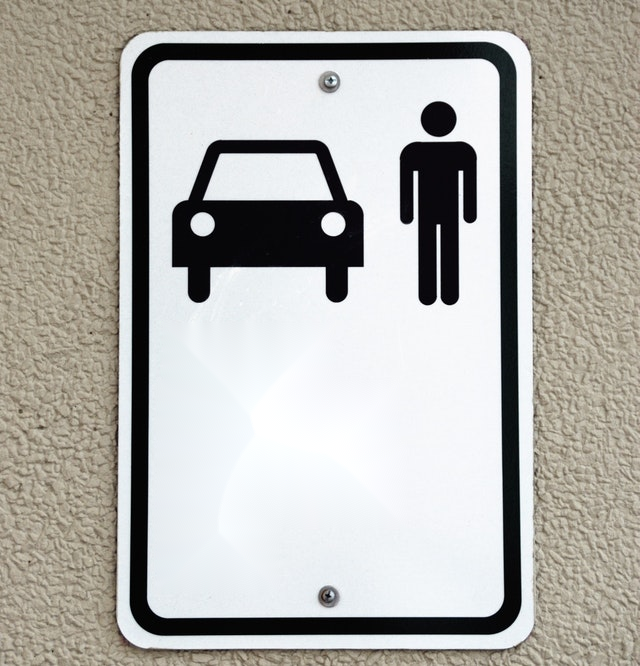

True

In [6]:

# import numpy as np
# import cv2
# from google.colab.patches import cv2_imshow

img = cv2.imread(file_path)
mask = cv2.imread('shapes.jpg',0)
dst = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
cv2_imshow(dst)

# 저장
cv2.imwrite("inpaint.jpg", dst)

In [ ]:
from PIL import Image 
from PIL import ImageFont
from PIL import ImageDraw


# db.set_character_set('utf8')
# dbc.execute('SET NAMES utf8;')
# dbc.execute('SET CHARACTER SET utf8;')
# dbc.execute('SET character_set_connection=utf8;')


# font = ImageFont.load_default()
font = ImageFont.truetype("NotoSansKR-Black.otf", 58)

img = Image.open('inpaint.jpg')


draw = ImageDraw.Draw(img)
# draw.text((163, 323), (333, 385)),"AAAAAAAAAAA!",(0,0,0),font=font)
# draw.text((158, 380), (398, 458)),"BBBBBBB & !",(0,0,0),font=font)
# draw.text((157, 442), (406, 527)),"CCCCCC !",(0,0,0),font=font)
# draw.text((157, 511), (278, 591)),"DDDDD !",(0,0,0),font=font)



# draw.text((163, 323),"환  자 ",(0,0,0),font=font)
# draw.text((158, 380),"픽  업  & ",(0,0,0),font=font)
# draw.text((157, 442),"퇴  원 ",(0,0,0),font=font)
# draw.text((157, 511),"오  직 ",(0,0,0),font=font)


draw.text(bbox_list[0][0], tranlated_texts[0], (0,0,0), font=font)
draw.text(bbox_list[1][0], tranlated_texts[1], (0,0,0), font=font)
draw.text(bbox_list[2][0], tranlated_texts[2], (0,0,0), font=font)
# draw.text(bbox_list[3][0], tranlated_texts[3], (0,0,0), font=font)







# img.show()

img.save("img_text.jpg")




In [ ]:
# import cv2
# import matplotlib.pyplot as plt
# import easyocr
# import sys
# import googletrans
# from typing import List
# import requests
# import numpy as np
# from PIL import Image, ImageFont, ImageDraw
# import torch

# print(torch.cuda.is_available())

# # Press Shift+F10 to execute it or replace it with your code.
# # Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

# # 이미지 파일 경로
# file_path = r'patientC.jpg'
# img = cv2.imread(file_path, cv2.IMREAD_COLOR)

# CLIENT_ID = "MawiiHEojSbWlRvZjWEM"
# CLIENT_SECRET = "gY1PNWHP54"

# if img is None:
#     print('Image load failed!')
#     sys.exit()


# # 이미지 출력함수
# def display(img):
#     # img_rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
#     plt.figure(figsize=(15, 15))
#     plt.imshow(img)
#     plt.show()


# def cleanup_text(text):
#     # strip out non-ASCII text so we can draw the text on the image
#     # using OpenCV
#     return "".join([c if ord(c) < 128 else "" for c in text]).strip()


# def easy_ocr_result(img, language='en', draw=True, text=False):
#     reader = easyocr.Reader([language])
#     results = reader.readtext(img)

#     # 바운딩박스 리스트
#     bbox_list = []
#     # 텍스트 리스트
#     text_list = []

#     if draw == False: # 원래 이미지만 출력
#         display(img)

#     elif draw == True and text == False: # 이미지에 바운딩 박스그리기
#         img2 = img.copy()
#         # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
#         for (bbox, text, prob) in results:
#             # display the OCR'd text and associated probability
#             # print("[INFO] {:.4f}: {}".format(prob, text))

#             bbox_list.append(bbox)
#             text_list.append(text)
#             # unpack the bounding box
#             (tl, tr, br, bl) = bbox
#             tl = (int(tl[0]), int(tl[1]))
#             tr = (int(tr[0]), int(tr[1]))
#             br = (int(br[0]), int(br[1]))
#             bl = (int(bl[0]), int(bl[1]))
#             # cleanup the text and draw the box surrounding the text along
#             # with the OCR's text itself
#             cv2.rectangle(img2, tl, br, (255, 0, 0), 2)

#         # show the output image
#         display(img2)

#     elif draw == True and text == True:  # 이미지에 바운딩 + 인식한 글자
#         img2 = img.copy()
#         # img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

#         for (bbox, text, prob) in results:
#             # display the OCR'd text and associated probability
#             # print("[INFO] {:.4f}: {}".format(prob, text))

#             bbox_list.append(bbox)
#             text_list.append(text)

#             # unpack the bounding box
#             (tl, tr, br, bl) = bbox
#             tl = (int(tl[0]), int(tl[1]))
#             tr = (int(tr[0]), int(tr[1]))
#             br = (int(br[0]), int(br[1]))
#             bl = (int(bl[0]), int(bl[1]))
#             # cleanup the text and draw the box surrounding the text along
#             # with the OCR'd text itself
#             text = cleanup_text(text)
#             cv2.rectangle(img2, tl, br, (255, 0, 0), 2)
#             cv2.putText(img2, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

#         # show the output image
#         display(img2)
#     return np.array(bbox_list), text_list


# def translate_texts(texts: List[str], type='google') -> List[str]:
#     global tranlated_texts
#     if type == 'google':
#         translator = googletrans.Translator()
#         tranlated_texts = [
#             translator.translate(text=text, src='en', dest='ko').text
#             for text in texts
#         ]
#     elif type == 'naver':
#         url = "https://openapi.naver.com/v1/papago/n2mt"
#         header = {"X-Naver-Client-Id": CLIENT_ID, "X-Naver-Client-Secret": CLIENT_SECRET}
#         tranlated_texts = []
#         for text in texts:
#             data = {'text': text, 'source': 'en', 'target': 'ko'}
#             response = requests.post(url, headers=header, data=data)
#             rescode = response.status_code
#             if rescode == 200:
#                 t_data = response.json()
#                 tranlated_texts.append(t_data['message']['result']['translatedText'])
#             else:
#                 print("Error Code:", rescode)

#     return tranlated_texts
# def cut_image(img, bbox):
#     x_min = bbox[0, 0]
#     x_max = bbox[1, 0]
#     y_min = bbox[0, 1]
#     y_max = bbox[2, 1]

#     img = img[y_min:y_max, x_min:x_max]

#     return img

# def mask_image(img2):
#     # masking 작업
#     img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#     _, mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)

#     # 글씨 색이 밝든 어둡든 masking 씌워주기
#     return_rgb = rgb(img2)
#     if return_rgb == 0:
#         mask = cv2.bitwise_not(mask)

#     kernel = np.ones((3, 3), np.uint8)
#     mask = cv2.dilate(mask, kernel, iterations=2)
#     # plt.imshow(mask)
#     # plt.show()
#     return mask


# def change_original(masked_img, bbox):
#     x_min = bbox[0, 0]
#     x_max = bbox[1, 0]
#     y_min = bbox[0, 1]
#     y_max = bbox[2, 1]

#     img[y_min:y_max, x_min:x_max] =  masked_img
#     return img

# def rgb(img):
#     r1, g1, b1 = img[0][0]
#     r2, g2, b2 = img[-1][0]
#     r3, g3, b3 = img[-1][-1]
#     r4, g4, b4 = img[0][-1]
#     # 배경이 밝은 부분이 한 부분이라도 있으면
#     ##
#     # 수정필요함 (귀퉁이 4개중 2개 이상이 흰색이면 이런식으로 )
#     if (r1>=0 and g1>150 and b1>150) or (r2>150 and g2>=0 and b2>150)\
#             or (r3>150 and g3>150 and b3>=0) or (r4>150 and g4>150 and b4>150):
#         return 0

# def rewrite(tranlated_texts ,bbox_list):
#     # 폰트( 구글 폰트에서 이용가능 ) , 폰트크기
#     image_path = 'output_inpainting'
#     img = Image.open(f"{image_path}/{file_path}")

#     image_editable = ImageDraw.Draw(img)

#     # (x, y ) , ( 237, 230, 211) 색감
#     for idx, bbox in enumerate(bbox_list):
#         text = tranlated_texts[idx]
#         title_font = ImageFont.truetype('ttf/NotoSansKR-Bold.otf', 1)
#         wi, _ = title_font.getsize(text)
#         # bbox_wi = bbox[1][0] - bbox[0][0]
#         bbox_hi = bbox[2][1] - bbox[1][1]

#         font_size = decsion_font_size(bbox_hi, text)
#         title_font = ImageFont.truetype('ttf/NotoSansKR-Bold.otf', font_size)
#         image_editable.text((bbox[0][0], bbox[0][1]), text, (255,255,255), anchor = 'lt', font=title_font)

#     save_rewrite_images(img)

# def decsion_font_size( bbox_hi, text):
#     font_size = 1
#     title_font = ImageFont.truetype('ttf/NotoSansKR-Bold.otf', font_size)
#     _, hi = title_font.getsize(text)
#     while hi < bbox_hi:
#         title_font = ImageFont.truetype('ttf/NotoSansKR-Bold.otf', font_size)
#         font_size += 1
#         _, hi = title_font.getsize(text)
#     return font_size



# def save_inpainting_images():
#     image_path = f'output_inpainting'
#     save_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     save_img.save(f"{image_path}/{file_path}")

# def save_rewrite_images(img):
#     image_path = 'output_rewrite'
#     img.save(f"{image_path}/{file_path}")

# # Press the green button in the gutter to run the script.
# if __name__ == '__main__':
#     bbox_list, text_list = easy_ocr_result(img)
#     print('Text_list :', text_list)
#     tranlated_texts: List[str] = translate_texts(texts=text_list, type='naver')
#     print(f'Tranlated_texts : {tranlated_texts}')

#     for bbox in bbox_list:
#         img_cut = cut_image(img, bbox)
#         mask = mask_image(img_cut)
#         masked_img = cv2.inpaint(img_cut, mask, 3, cv2.INPAINT_TELEA)
#         img = change_original(masked_img, bbox)

#     save_inpainting_images()
#     rewrite(tranlated_texts,bbox_list)



